In [305]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_samples, silhouette_score
from tqdm import tqdm as tq

In [306]:
df = pd.read_csv('h4_client_spb.csv')

In [307]:
df = df.drop(np.where(df['Unnamed: 0'] == '829885b77a1f36ea8363d8839f8ca80c')[0])

In [308]:
df = df.drop(np.where(df['Unnamed: 0'] == 'd45587755dfd74d4eee8668cd7c2c753')[0])

In [309]:
df = df.drop(np.where(df['Unnamed: 0'] == 'ca55b7df9043d95041a153d14c5294d8')[0])

In [310]:
client = df['Unnamed: 0']

In [311]:
df = df.drop(['Unnamed: 0'], axis = 1)



  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [01:47<08:58, 107.61s/it]

 33%|███▎      | 2/6 [03:51<07:29, 112.50s/it]

 50%|█████     | 3/6 [06:13<06:04, 121.35s/it]

 67%|██████▋   | 4/6 [08:15<04:02, 121.43s/it]

 83%|████████▎ | 5/6 [10:14<02:00, 120.73s/it]

100%|██████████| 6/6 [11:58<00:00, 119.67s/it]


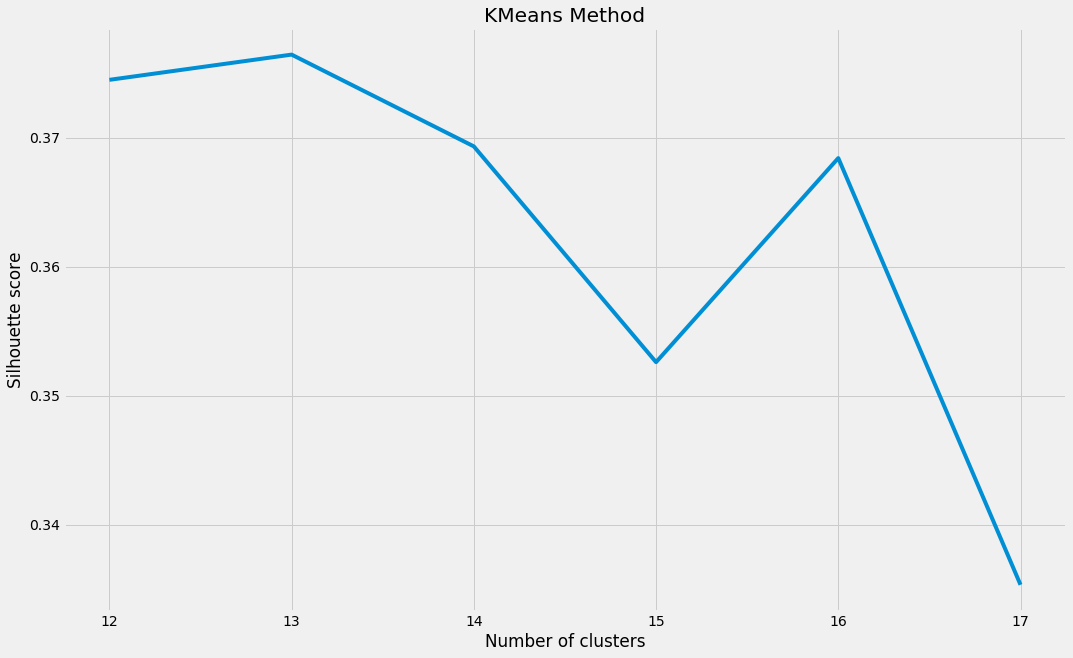

In [312]:
#wcss_1 = []
sil = []
for i in tq(range(12, 18)):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    #kmeans.fit(new)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    sil.append(silhouette_avg)
    #wcss.append(kmeans.inertia_
plt.figure(figsize=(16, 10))
plt.style.use('fivethirtyeight')
plt.plot(range(12, 18), sil)
plt.title('KMeans Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [313]:
kmeans = KMeans(n_clusters=13, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df)
silhouette_avg = silhouette_score(df, cluster_labels)

In [314]:
print('score is', silhouette_avg)

score is 0.376460361974314


In [315]:
max(cluster_labels)

12

In [316]:
df['cluster_id'] = cluster_labels

In [317]:
df['client'] = client

In [318]:
df.head()

,9eed45f71360b4b1e2590637467220e5,de2eb747e0896c050905a6b635ab800a,8a969031832c535daf96e0c2aed8e814,4c0dc012ebb679a18b244c53c6f59b5a,ba4078a37e1d6d97a5d3082b255ac3eb,1558ced753948e9206bb1cc3b13026d0,343e5c290ef63e64466846bc156d05d0,b03838d2abc4863bc2862f7d4ea5aad3,7063fd16e7413e8cec198e19a64d8f76,ee4d6ae77fb633ed319c672a44241765,...,9d3b6c2b4f3a3a2ccf77622cccd2cb61,a5996316d1f748cfa99cf2d11d962452,0efc822186d214f06e8c98b6a3c51b99,7bdd7f2afd7e1fe1f8421650367e1e20,326288e450af6af1e6754d3e29ad1efa,7d8eeb9e2cd483b54737786e2f851757,53a8229920d539249d8420b6575608bc,51cc615503c0cc2e6fe6d6828c8bde60,cluster_id,client
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,90fca68123e692a005a4edeadd94b2f2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,26f3232ab25e58588cd2b4002b6f7836
2,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,eb09b11a1efb6e12f122e78bde33e5c3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,4d68fdddb5deaa496ce485bd51929ab1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,b17f18f007c151b2615f942eaa785e46


In [319]:
clients = pd.read_csv('clients.csv')

In [320]:
clients['client'] = clients['client_id']
clients = clients.drop(['client_id'], axis = 1)

In [321]:
left = df
right = clients
result = pd.merge(left.assign(x=left.client.astype(str)),
right.assign(x=right.client.astype(str)),
how='left', on='client')

In [322]:
result.head()

,9eed45f71360b4b1e2590637467220e5,de2eb747e0896c050905a6b635ab800a,8a969031832c535daf96e0c2aed8e814,4c0dc012ebb679a18b244c53c6f59b5a,ba4078a37e1d6d97a5d3082b255ac3eb,1558ced753948e9206bb1cc3b13026d0,343e5c290ef63e64466846bc156d05d0,b03838d2abc4863bc2862f7d4ea5aad3,7063fd16e7413e8cec198e19a64d8f76,ee4d6ae77fb633ed319c672a44241765,...,7d8eeb9e2cd483b54737786e2f851757,53a8229920d539249d8420b6575608bc,51cc615503c0cc2e6fe6d6828c8bde60,cluster_id,client,x_x,gender,city,birthyear,x_y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10,90fca68123e692a005a4edeadd94b2f2,90fca68123e692a005a4edeadd94b2f2,M,St. Petersburg,1957.0,90fca68123e692a005a4edeadd94b2f2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8,26f3232ab25e58588cd2b4002b6f7836,26f3232ab25e58588cd2b4002b6f7836,M,Other,1962.0,26f3232ab25e58588cd2b4002b6f7836
2,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,...,0.0,0.0,0.0,8,eb09b11a1efb6e12f122e78bde33e5c3,eb09b11a1efb6e12f122e78bde33e5c3,F,St. Petersburg,1962.0,eb09b11a1efb6e12f122e78bde33e5c3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10,4d68fdddb5deaa496ce485bd51929ab1,4d68fdddb5deaa496ce485bd51929ab1,M,St. Petersburg,1966.0,4d68fdddb5deaa496ce485bd51929ab1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,b17f18f007c151b2615f942eaa785e46,b17f18f007c151b2615f942eaa785e46,F,St. Petersburg,1961.0,b17f18f007c151b2615f942eaa785e46
